<h1 style="font-size: 50px; color: #aa80ff;text-align: center;
">Pakistan Used Car Prices 2023</h1>

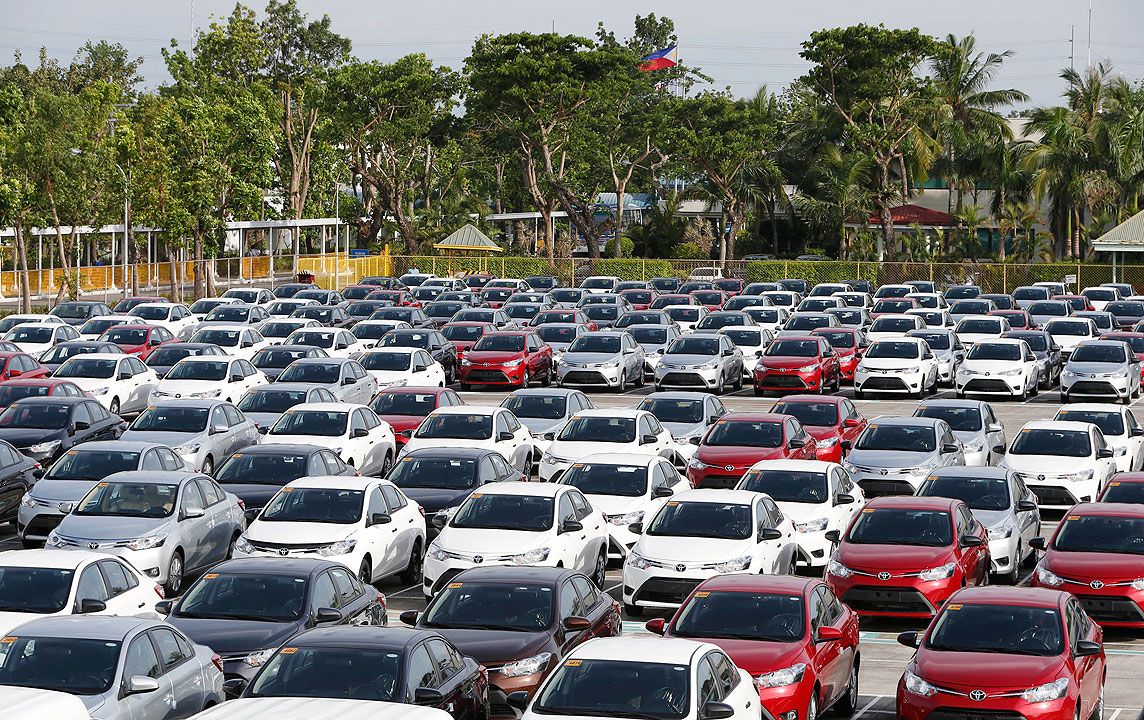

This data has been scraped from the most renowned second-hand Car Selling company's website. The data contains approximately more than 60,000 cars From this dataset from this dataset i decided to find out wheather ther is any relationship exits between price of the cars and other factors.

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, RobustScaler,StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split

### Load Data set

In [2]:
df=pd.read_csv('./used_car_dataset.csv')
df

,Unnamed: 0,brand,currency,description,fuel_type,item_condition,manufacturer,mileage_from_odometer,model_date,price,vehicle_engine,vehicle_transmission
0,0,MG,PKR,MG HS 2021 for sale in Lahore,Petrol,used,MG,"6,000 km",2021.0,6525000.0,1490cc,Automatic
1,1,Toyota,PKR,Toyota Aygo 2012 for sale in Islamabad,Petrol,used,Toyota,"68,000 km",2012.0,1625000.0,1000cc,Manual
2,2,Honda,PKR,Honda City 2015 for sale in Lahore,Petrol,used,Honda,"150,000 km",2015.0,2550000.0,1300cc,Automatic
3,3,KIA,PKR,KIA Sorento 2022 for sale in Sialkot,Petrol,used,KIA,"18,000 km",2022.0,9000000.0,3500cc,Automatic
4,4,Toyota,PKR,Toyota Corolla 2015 for sale in Rawalpindi,Petrol,used,Toyota,"110,000 km",2015.0,3350000.0,1300cc,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...
60104,60104,KIA,PKR,KIA Sportage 2022 for sale in Lahore,Petrol,used,KIA,10 km,2022.0,7900000.0,2000cc,Automatic
60105,60105,KIA,PKR,KIA Picanto 2022 for sale in Lahore,Petrol,used,KIA,10 km,2022.0,3350000.0,1000cc,Automatic
60106,60106,Suzuki,PKR,Suzuki Swift 2022 for sale in Lahore,Petrol,used,Suzuki,10 km,2022.0,4750000.0,1200cc,Automatic
60107,60107,Suzuki,PKR,Suzuki Wagon R 2018 for sale in Rawalpindi,Hybrid,used,Suzuki,"15,000 km",2018.0,3175000.0,660cc,Automatic


### Let’s have a look at the insights of the columns to understand the data type of all the columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60109 entries, 0 to 60108
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             60109 non-null  int64  
 1   brand                  60109 non-null  object 
 2   currency               60109 non-null  object 
 3   description            60109 non-null  object 
 4   fuel_type              60109 non-null  object 
 5   item_condition         60109 non-null  object 
 6   manufacturer           60109 non-null  object 
 7   mileage_from_odometer  60109 non-null  object 
 8   model_date             60109 non-null  float64
 9   price                  60109 non-null  float64
 10  vehicle_engine         60109 non-null  object 
 11  vehicle_transmission   60109 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 5.5+ MB


### Before starting everything, let’s Remove the columns Unnamed:0 which contains same value as index

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

### Then find out How many Raws and columns that the dataset contains

In [5]:
df.shape

(60109, 11)

### Finding the statistical measures from the data set

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
model_date,60109.0,2.011316e+03,9.459468e+00,1942.0,2006.0,2013.0,2019.0,2023.0
price,60109.0,3.603460e+06,5.586388e+06,1780.0,1200000.0,2300000.0,4100000.0,210000000.0


### Let’s have a look at whether this dataset contains any null values or not

In [7]:
df.isnull().mean()*100

brand                    0.0
currency                 0.0
description              0.0
fuel_type                0.0
item_condition           0.0
manufacturer             0.0
mileage_from_odometer    0.0
model_date               0.0
price                    0.0
vehicle_engine           0.0
vehicle_transmission     0.0
dtype: float64

<h1 style="font-size: 35px; color:#ff8c1a;text-align: center;
">EXPLORATORY DATA ANALYSIS</h1>

<h1 style="font-size: 25px; color:#000000;text-align: center;
">UNIVARIATE ANALYSIS</h1>

### Analyze the data by Plotiing the Histpot 

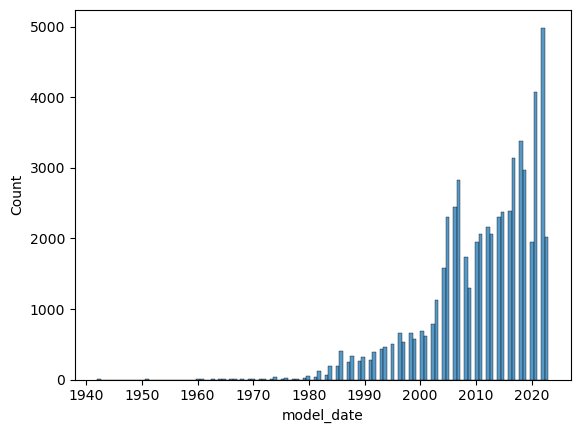

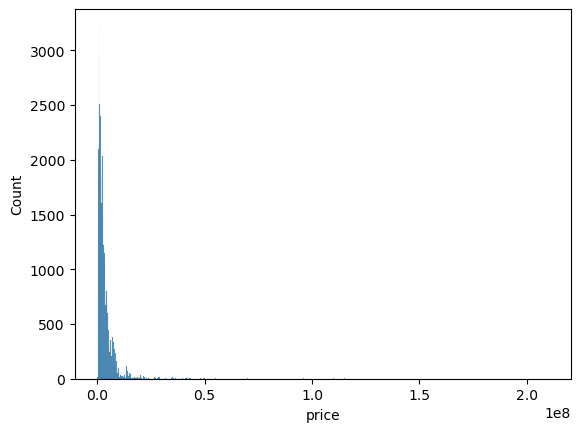

In [8]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i])
        plt.show()

### Analyze the data by plottinig kde plot 

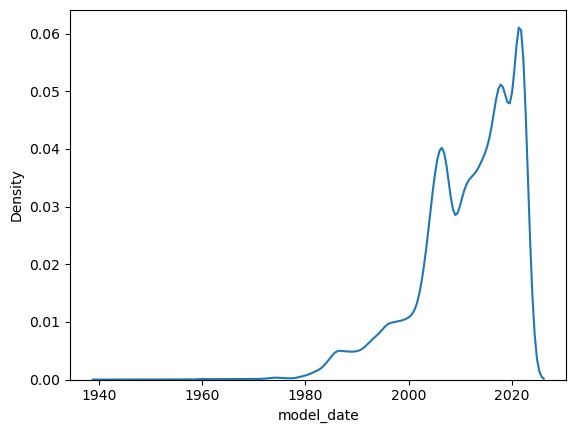

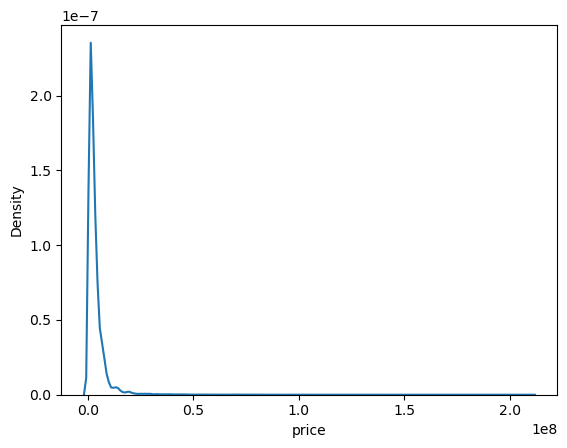

In [9]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.kdeplot(df[i])
        plt.show()

### Find out the outliers present in the data set using Boxplot

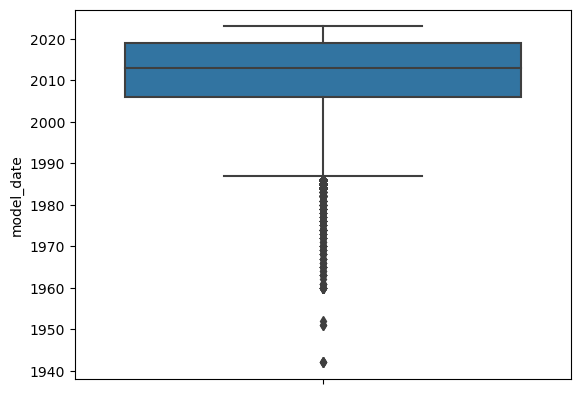

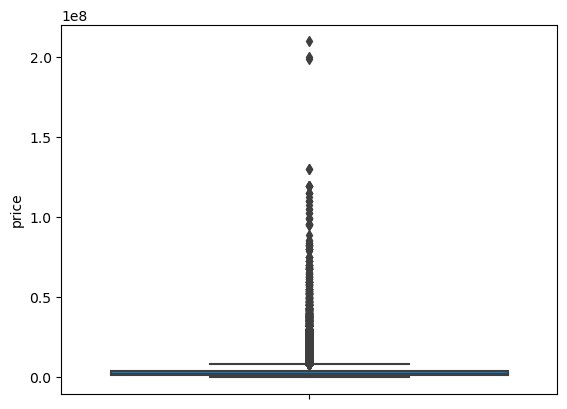

In [10]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i])
        plt.show()

### Then Remove  the word 'km'  and  ','  from column 'mileage_from_odometer' to make the data set more accurate

In [12]:
df['mileage_from_odometer'] = df['mileage_from_odometer'].str.replace(r'\D', "")
df

,brand,currency,description,fuel_type,item_condition,manufacturer,mileage_from_odometer,model_date,price,vehicle_engine,vehicle_transmission
0,MG,PKR,MG HS 2021 for sale in Lahore,Petrol,used,MG,6000,2021.0,6525000.0,1490cc,Automatic
1,Toyota,PKR,Toyota Aygo 2012 for sale in Islamabad,Petrol,used,Toyota,68000,2012.0,1625000.0,1000cc,Manual
2,Honda,PKR,Honda City 2015 for sale in Lahore,Petrol,used,Honda,150000,2015.0,2550000.0,1300cc,Automatic
3,KIA,PKR,KIA Sorento 2022 for sale in Sialkot,Petrol,used,KIA,18000,2022.0,9000000.0,3500cc,Automatic
4,Toyota,PKR,Toyota Corolla 2015 for sale in Rawalpindi,Petrol,used,Toyota,110000,2015.0,3350000.0,1300cc,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
60104,KIA,PKR,KIA Sportage 2022 for sale in Lahore,Petrol,used,KIA,10,2022.0,7900000.0,2000cc,Automatic
60105,KIA,PKR,KIA Picanto 2022 for sale in Lahore,Petrol,used,KIA,10,2022.0,3350000.0,1000cc,Automatic
60106,Suzuki,PKR,Suzuki Swift 2022 for sale in Lahore,Petrol,used,Suzuki,10,2022.0,4750000.0,1200cc,Automatic
60107,Suzuki,PKR,Suzuki Wagon R 2018 for sale in Rawalpindi,Hybrid,used,Suzuki,15000,2018.0,3175000.0,660cc,Automatic


### Remove the word 'cc',  from column 'vehicle_engine' to make the data set more accurate

In [13]:
df['vehicle_engine'] = df['vehicle_engine'].str.replace(r'\D', "")
df

,brand,currency,description,fuel_type,item_condition,manufacturer,mileage_from_odometer,model_date,price,vehicle_engine,vehicle_transmission
0,MG,PKR,MG HS 2021 for sale in Lahore,Petrol,used,MG,6000,2021.0,6525000.0,1490,Automatic
1,Toyota,PKR,Toyota Aygo 2012 for sale in Islamabad,Petrol,used,Toyota,68000,2012.0,1625000.0,1000,Manual
2,Honda,PKR,Honda City 2015 for sale in Lahore,Petrol,used,Honda,150000,2015.0,2550000.0,1300,Automatic
3,KIA,PKR,KIA Sorento 2022 for sale in Sialkot,Petrol,used,KIA,18000,2022.0,9000000.0,3500,Automatic
4,Toyota,PKR,Toyota Corolla 2015 for sale in Rawalpindi,Petrol,used,Toyota,110000,2015.0,3350000.0,1300,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
60104,KIA,PKR,KIA Sportage 2022 for sale in Lahore,Petrol,used,KIA,10,2022.0,7900000.0,2000,Automatic
60105,KIA,PKR,KIA Picanto 2022 for sale in Lahore,Petrol,used,KIA,10,2022.0,3350000.0,1000,Automatic
60106,Suzuki,PKR,Suzuki Swift 2022 for sale in Lahore,Petrol,used,Suzuki,10,2022.0,4750000.0,1200,Automatic
60107,Suzuki,PKR,Suzuki Wagon R 2018 for sale in Rawalpindi,Hybrid,used,Suzuki,15000,2018.0,3175000.0,660,Automatic


### removing '' symbol by replacing it with zero

In [14]:
df['vehicle_engine'].replace('', 0, inplace=True)
df.vehicle_engine.isnull().sum()

0

### Adding new column  Engine and change the datatype it from object to int


In [15]:
df['Engine'] = df['vehicle_engine'].astype('int64')

In [16]:
df.dtypes

brand                     object
currency                  object
description               object
fuel_type                 object
item_condition            object
manufacturer              object
mileage_from_odometer     object
model_date               float64
price                    float64
vehicle_engine            object
vehicle_transmission      object
Engine                     int64
dtype: object

### Adding new column 'Mileage'  and change the datatype of it from object to int

In [17]:
df['Mileage'] = df['mileage_from_odometer'].astype('int64')
df

### Adding new column  'Date'  and change the datatype from object to int

In [19]:
df['Date'] = df['model_date'].astype('int64')
df

### Dropping Existing columns  mileage_from_odometer,  model_date,  vehicle_engine

In [21]:
df.drop(columns=['mileage_from_odometer','model_date','vehicle_engine'], inplace=True)
df

### Plotting Histograme with mileage  from the given dataset

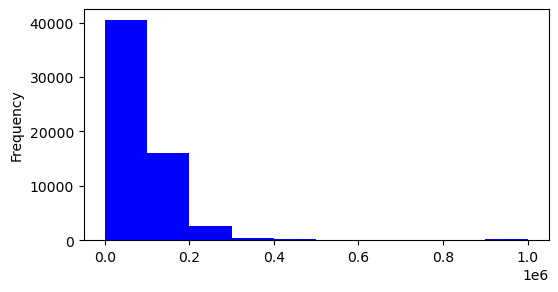

In [24]:
df.Mileage.plot.hist(figsize=(6,3), cmap='brg');

<h1 style="font-size: 25px; color:#000000;text-align: center;
">BIVARIATE ANALYSIS</h1>

### Plotting line plot using with Date and Mileage

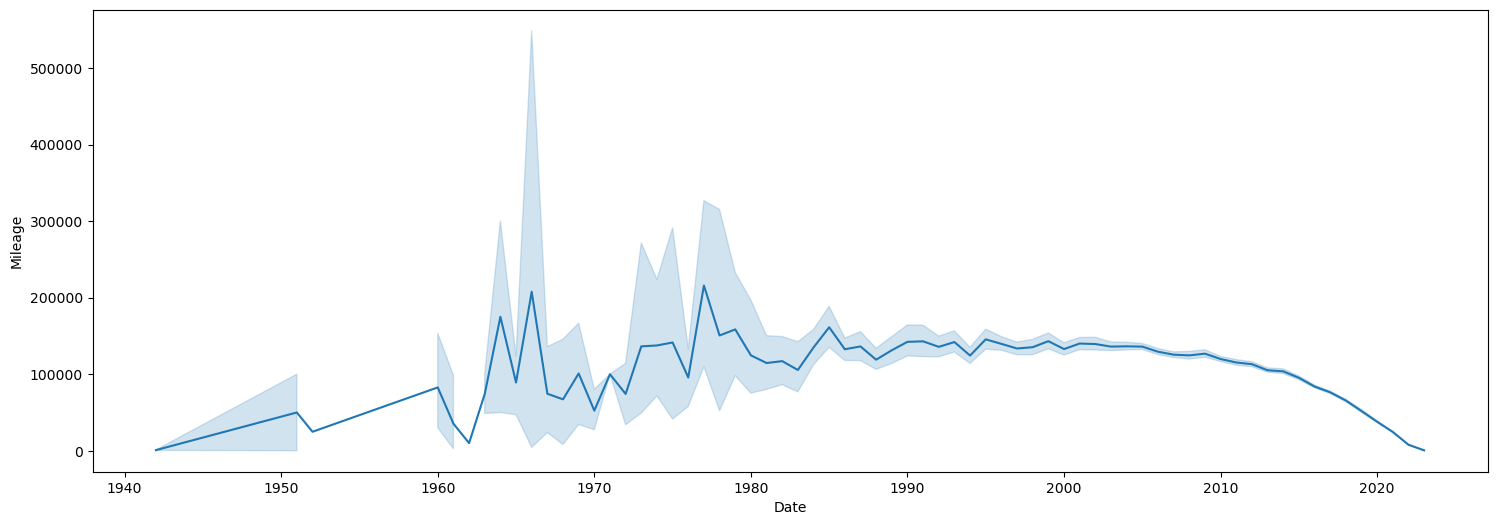

In [26]:
plt.figure(figsize=(18,6))
sns.lineplot(x='Date', y='Mileage', data=df)
plt.show()

### Then plot pie chart and plot bar to check which fuel_type have the largest mileage

In [28]:
mileage_fuel = df.groupby(['fuel_type'])['Mileage'].sum()

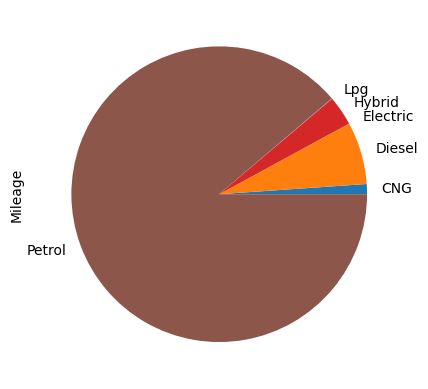

In [29]:
mileage_fuel.plot.pie();

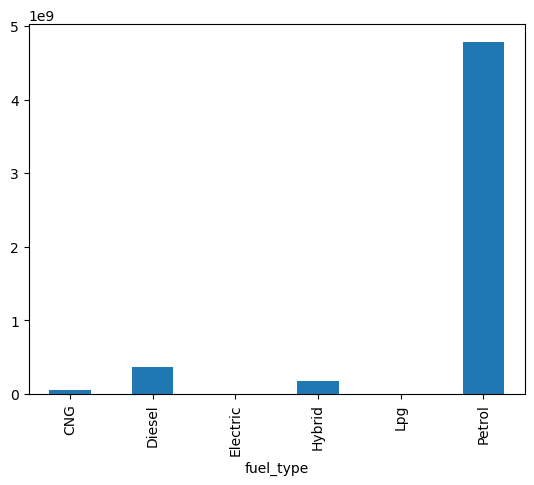

In [30]:
mileage_fuel.plot.bar();

### From the piechart and plot bar i Find out  that petrol type vehicles Having Largest mileage.So then I decided to plot Heatmap to Find the correlation with Each variables in the data set

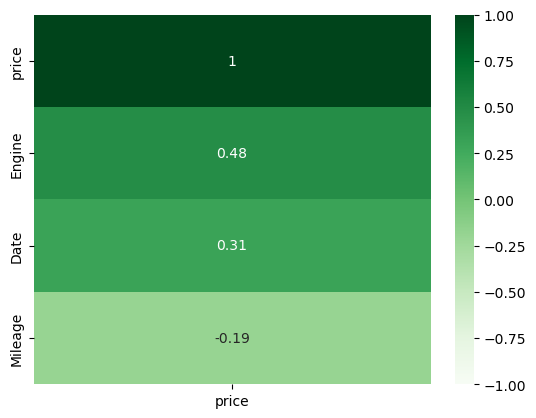

In [31]:
sns.heatmap(df.corr()[["price"]].sort_values(by="price", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

### After plotting the Heatmap I made in to the conclusion that There is limited no.of corelation with the Existing variables So i decided to Add other columns to find out Their Corelation so i used  label encoding and convert more categorical values into numerical values.

In [32]:
le=LabelEncoder()
df["manufacturer"]=le.fit_transform(df["manufacturer"])
df["brand"]=le.fit_transform(df["brand"])
df["currency"]=le.fit_transform(df["currency"])
df["description"]=le.fit_transform(df["description"])
df["fuel_type"]=le.fit_transform(df["fuel_type"])
df["item_condition"]=le.fit_transform(df["item_condition"])
df["vehicle_transmission"]=le.fit_transform(df["vehicle_transmission"])

### After doing Label Encoding i add more columns in to the heatmap and made into the conclusion that 'price' Have the Highest corelation value

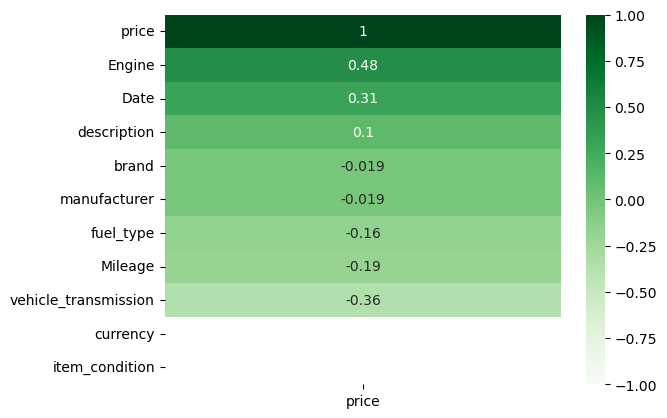

In [34]:
sns.heatmap(df.corr()[["price"]].sort_values(by="price", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

### Then i take Engine and date values in x and price values in y for prediction purpose

In [36]:
x=df[["Engine","Date"]].values
y=df[["price"]].values

### Then i take MinMaxScaler for scalling and then i done cross validation to find out the best model

In [37]:
sc=MinMaxScaler()

In [38]:
x=sc.fit_transform(x)

In [39]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    
}

In [40]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  4407450.77139326
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  4407450.444804562
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  4407155.618262461
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  2653353.123621663
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  2808564.8245032383
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  5064572.279592769
****************************************************

### After Checking the Average RMSE of each model I find out that  RandomForestRegressor  is the best model and then i fit that model for further purpose

In [41]:
rfr=RandomForestRegressor()

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [43]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [44]:
print("model trained with {}".format(rfr))
training_score = rfr.score(x_train, y_train)*100
testing_score = rfr.score(x_test, y_test)*100
score = r2_score(y_test, rfr.predict(x_test))*100
mae = mean_absolute_error(y_test, rfr.predict(x_test))
mse = mean_squared_error(y_test, rfr.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with RandomForestRegressor()
r2score:  73.9149098487859
training_score:  82.81881327555467
testing_score:  73.9149098487859
mae:  839469.8905345512
mse:  8130471206124.1
rmse_test:  2851398.1142807994


### After finding out the r2score,training_score,testing_score,mae,mse,rmse_test of the given model RandomForestRegressor.And Then i decided to predict the  'y' value

In [45]:
y_pred = rfr.predict(x)

### After predicting the y value i decided to compare it with actual value

In [46]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,6525000.0,6.606829e+06
1,1625000.0,1.444953e+06
2,2550000.0,2.644035e+06
3,9000000.0,4.792756e+07
4,3350000.0,2.644035e+06
...,...,...
60104,7900000.0,7.887823e+06
60105,3350000.0,3.021784e+06
60106,4750000.0,4.564400e+06
60107,3175000.0,2.829735e+06


### Then I plott the Actual value vs predicted value with the help of sctterplot 

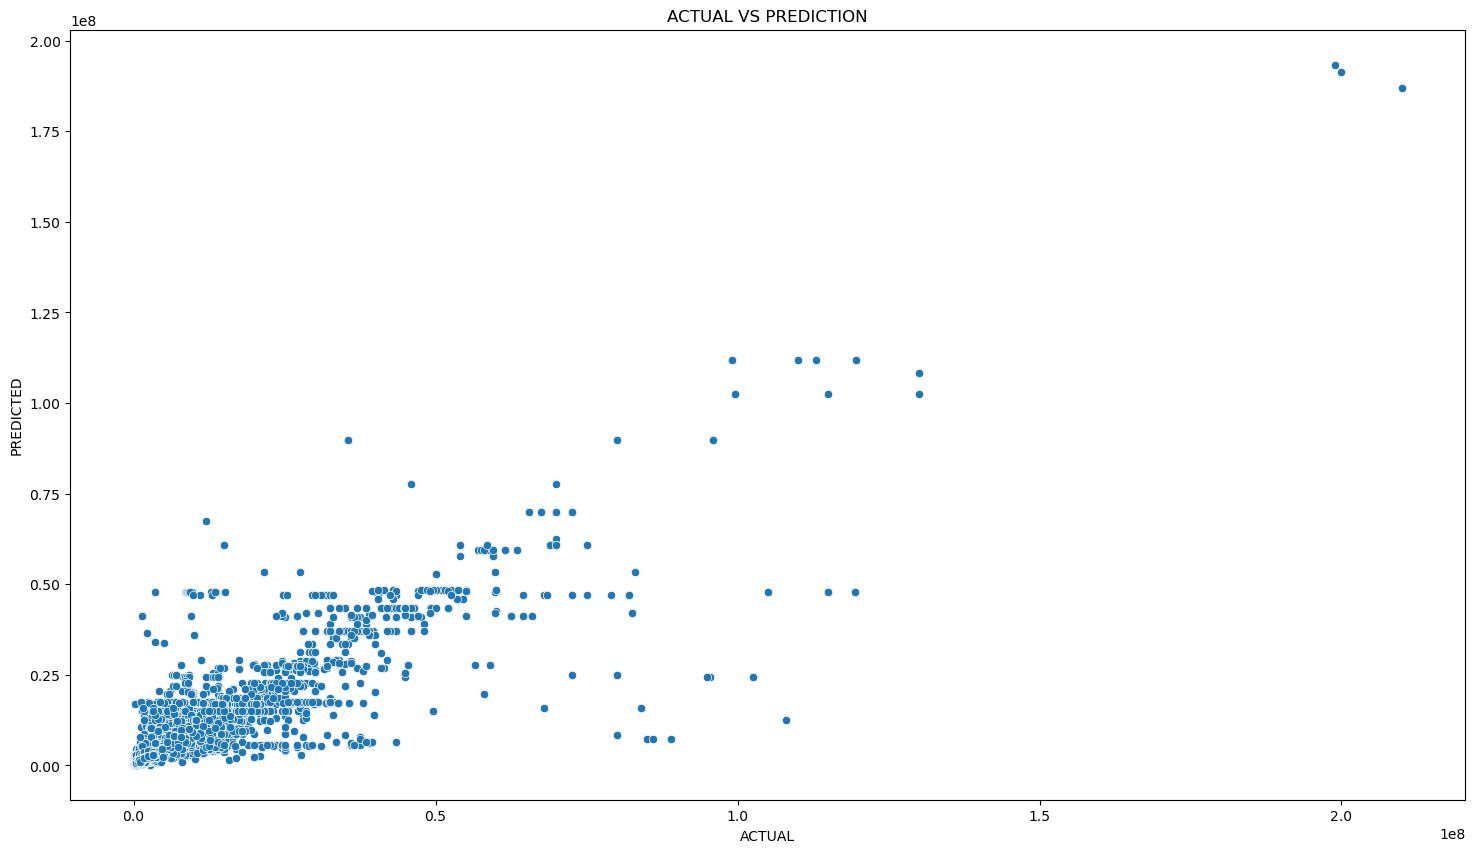

In [47]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()

## Conclusion

From all the conclusions  i find out that there is a large number of corelated values in between 0.0 to 0.5  in the scatterplots And there is high correlation between price of the car and other factors in the dataset